In [189]:
# Nama : Mia Amaliah
# NIM  : 1202922002
#Tugas : Multi Linear Regression Big Data Analytic




import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score





import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-disease-uci/heart.csv


In [190]:
# pd.read_csv = import data file nya dari dataset
#df.head (10) = jika ingin menampilkan 10 data teratas dari data frame


ht = pd.read_csv ("../input/heart-disease-uci/heart.csv")
ht.head (10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [191]:
#menampilkan 10 data terbawah
ht.tail (10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [192]:
ht.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [193]:
ht.groupby('target')['cp','thalach','slope','restecg'].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cp,thalach,slope,restecg
target,,,,
0,66,19196,161,62
1,227,26147,263,98


In [194]:
ht.groupby('target')['cp','thalach','slope','restecg'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


cp                                              thalach  \
        count      mean       std  min  25%  50%  75%  max   count   
target                                                               
0       138.0  0.478261  0.905920  0.0  0.0  0.0  0.0  3.0   138.0   
1       165.0  1.375758  0.952222  0.0  1.0  2.0  2.0  3.0   165.0   

                    ... slope      restecg                                     \
              mean  ...   75%  max   count      mean       std  min  25%  50%   
target              ...                                                         
0       139.101449  ...  1.75  2.0   138.0  0.449275  0.541321  0.0  0.0  0.0   
1       158.466667  ...  2.00  2.0   165.0  0.593939  0.504818  0.0  0.0  1.0   

                  
        75%  max  
target            
0       1.0  2.0  
1       1.0  2.0  

[2 rows x 32 columns]

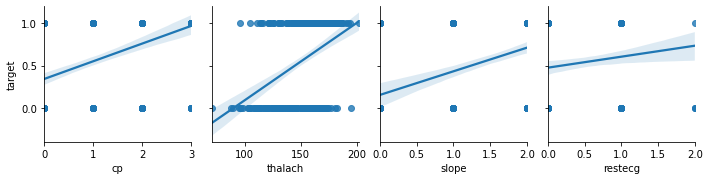

In [195]:
sns.pairplot (ht,x_vars=['cp','thalach','slope','restecg'],
                 y_vars=['target'],
                 kind='reg')

In [196]:
x=ht[['cp','thalach','slope','restecg']]
y=ht['target']



In [197]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size =0.2,random_state=0)
print (x_train)
print (y_train)

     cp  thalach  slope  restecg
74    2      165      1        1
153   2      152      1        0
64    2      165      2        0
296   0      136      1        1
287   1      164      2        0
..   ..      ...    ...      ...
251   0      143      1        0
192   0      113      1        1
117   3      162      1        0
47    2      156      2        0
172   1      160      1        0

[242 rows x 4 columns]
74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64


In [198]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform (x_test)


In [199]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [200]:
regressor.intercept_

-0.2364457771236831

In [201]:
regressor.coef_

array([0.48235086, 0.68004336, 0.26024433, 0.11425524])

In [202]:
y_pred = regressor.predict(x_test)
y_pred

array([0.10100506, 0.81208559, 0.83285027, 0.25705834, 0.66170905,
       0.3868376 , 0.11689673, 0.28820536, 0.0854068 , 0.34045997,
       0.93199283, 0.55851388, 0.18438195, 0.76082687, 0.7240031 ,
       0.64613554, 0.47545515, 0.94237517, 0.09615679, 0.78076308,
       0.63638144, 0.30899479, 0.22057747, 0.0857497 , 0.66738579,
       0.40734169, 0.58446973, 0.40275402, 0.69285608, 0.69334165,
       0.65130197, 0.28820536, 0.7192975 , 0.87488995, 0.77640038,
       0.3245683 , 0.48520925, 0.69850807, 0.27263185, 0.22556841,
       0.35052415, 0.48062158, 0.91122814, 0.13766141, 0.78647263,
       0.55834646, 0.71878718, 0.74995895, 0.30377887, 0.77120921,
       0.76601804, 0.44414071, 0.86967403, 0.42824904, 0.96313985,
       0.25708308, 0.67728256, 0.58915059, 0.8489341 , 0.71410633,
       0.15842609])

In [208]:
score=r2_score(y_test,y_pred)
score

0.44432156112497856